# Final Project 102 & 104
### Student name: Chow Hooi Koon

# Project: Private Residential Property Transaction in Singapore

This project will show the transactions of private residential property transaction in Singapore from a predetermined range of dates, giving clear insights into some of the important aspect in terms of prices, dates purchase, district etc.

### Dataset resource
I will be using dataset from the open sources of URA website namely from: 
https://www.ura.gov.sg/realEstateIIWeb/transaction/search.action
https://www.ura.gov.sg/maps/api/#private-residential-property-transactions

### From data, we will have the:
Project name of the property – a very specific attribute on the location, could be a specification on outliers, e.g. an ultra-expensive project compared to its peers in the same postal district. 

Street name – a broader look on the project, can be used to gauge for an expensive street among the postal districts. 

Type of property – important classification among condominiums, apartment, EC etc 

Postal District – an important criterion on location which determine prices. 

Type of sale (New/Sub or Resale) – helps to categorise according to market demands. 

Market Segment (CCR/RCR/OCR) – an even broader terms on location use for a quick broad view of the different Segment for quick analysis on the market demand. 

Tenure of the property – freehold or 99 years. 

Number of units – Total how many unit was sold. 

Price of transaction – the sold of the property. 

Area (Sqft) – Area of the property which helps to make sense of the price of transaction. 

Type of area – Strata, Landed, Strata-landed. 

Floor level – another small criterion on the property pricing where higher level usually meant a higher price.  

Unit price (PSF) – an important criterion on pricing which is more suitable as a mean of comparison among the properties. 

Date of sale – can be used to read trend of the market.



## What is CCR, RCR and OCR?
The Urban Redevelopment Authority (URA) has divided Singapore into three main regions, which the URA calls "market segments".

These regions are: Core Central Region (CCR), Rest of Central Region (RCR) and the Outside Central Region (OCR).

Core Central Region (CCR): postal district 9,10,11 and parts of 1,2,4,6,7 \
Rest of Central Region (RCR): postal district 3,8,12 and parts of 1,2,4,5,6,7,13,14,15 and 20. \
Outside Central Region (OCR): postal district 16 to 19,22,23,25 to 28 and parts of 5,14,15 and 20.


### Data clarification
I filtered data from URA as below: \
CCR - 3 postal district of 9, 10 and 11. \
RCR - 3 postal district of 3, 8 and 12. \
OCR - 3 postal district of 16, 17 and 18. \

### District area
District 9  - Orchard, Somerset, River Valley. \
District 10 - Tanglin, Bukit Timah, Holland. \
District 11 - Newton, Novena, Duearn, Wattern. \
District 3  - Queenstown, Alexandra, Tiong Bahru. \
District 8  - Little India, Ferrer Park. \
District 12 - Balestier, Whampoa, Toa Payoh, Boon Keng, Bendemeer, Kampong Bugis. \
District 16 - Bedok, Upper East Coast, Bayshore, Tanah Merah, Upper Changi. \
District 17 - Flora Drive, Loyang, Changi. \
District 18 - Tampines, Pasir Ris.

### Data period
It shows latest 60 months transaction. 

### Building type
Focus in apartments and condominiums only.

### Transaction
Transaction included new sale, resale and subsale.

## Data understanding and exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import numpy as np

In [2]:
# df_ccr is data of apartment & condominium that forcus on core central region, district 9,10 & 11.
df_ccr = pd.read_csv('private-residential-property-transaction-CCR-dist-9-10-11.csv')

# df_rcr is data of apartment & condominium that forcus on rest of central region, district 3,8 & 12.
df_rcr = pd.read_csv('private-residential-property-transaction-RCR-dist-3-8-12.csv')

# df_ocr is data of apartment & condominium that forcus on outside central region, district 16,17 & 18.
df_ocr = pd.read_csv('private-residential-property-transaction-OCR-dist-16-17-18.csv')

In [3]:
# combine data
df_combine = pd.concat([df_ccr, df_rcr, df_ocr], axis = 0)

In [4]:
# check for null value in data and details
df_combine.isnull().sum()

project_name       0
street_name        0
type               0
postal_district    0
market_segment     0
tenure             0
type_of_sale       0
no_of_units        0
price_in_sgd       0
nett_price         0
area_sqft          0
type_of_area       0
floor_level        0
unit_price_psf     0
date_of_sale       0
dtype: int64

In [5]:
# check type of data and quantity
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35622 entries, 0 to 11684
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   project_name     35622 non-null  object
 1   street_name      35622 non-null  object
 2   type             35622 non-null  object
 3   postal_district  35622 non-null  int64 
 4   market_segment   35622 non-null  object
 5   tenure           35622 non-null  object
 6   type_of_sale     35622 non-null  object
 7   no_of_units      35622 non-null  int64 
 8   price_in_sgd     35622 non-null  int64 
 9   nett_price       35622 non-null  object
 10  area_sqft        35622 non-null  int64 
 11  type_of_area     35622 non-null  object
 12  floor_level      35622 non-null  object
 13  unit_price_psf   35622 non-null  int64 
 14  date_of_sale     35622 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.3+ MB


In [6]:
# overview of the basic stats for the dataframe
display(df_combine.describe())

,postal_district,no_of_units,price_in_sgd,area_sqft,unit_price_psf
count,35622.000000,35622.000000,3.562200e+04,35622.000000,35622.000000
mean,11.045449,1.080007,2.103473e+06,1257.557829,1637.997389
std,5.139964,4.160517,1.168296e+07,7098.359864,603.697853
min,3.000000,1.000000,2.880000e+05,323.000000,237.000000
25%,9.000000,1.000000,1.010175e+06,678.000000,1218.000000
50%,10.000000,1.000000,1.398000e+06,980.000000,1539.000000
75%,16.000000,1.000000,2.000000e+06,1324.000000,1940.000000
max,18.000000,560.000000,9.800000e+08,947081.000000,5125.000000


## 1. Transaction units between market segment

In [7]:
t_combine = df_combine.loc[:,['date_of_sale','market_segment']]
t_combine = t_combine.groupby('market_segment').count()

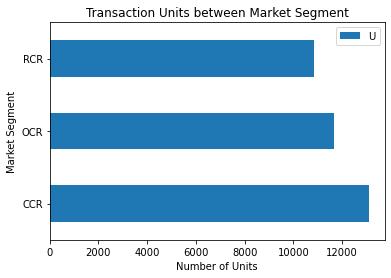

In [8]:
t_combine.plot(kind = 'barh')
plt.xlabel('Number of Units')
plt.ylabel('Market Segment')
plt.title('Transaction Units between Market Segment')
plt.legend('Unit of transaction')
plt.show()

From above chart, we noticed that CCR has the highest transaction among 3 market segments. 
This may because of the investors prefer to invest in CCR area. \
OCR transaction is higher that RCR, the reason maybe because of government and property companies focus to develope the land of OCR. 

## 2. Growth of sales
Growth of sales among the market segments in the past 5 years.

In [9]:
x = df_combine
x.date_of_sale = pd.to_datetime(x['date_of_sale'],format='%b-%y')
x['date_of_sale'] = x.date_of_sale.dt.year
x = x.groupby(['date_of_sale','postal_district']).mean()
x = x.reset_index()

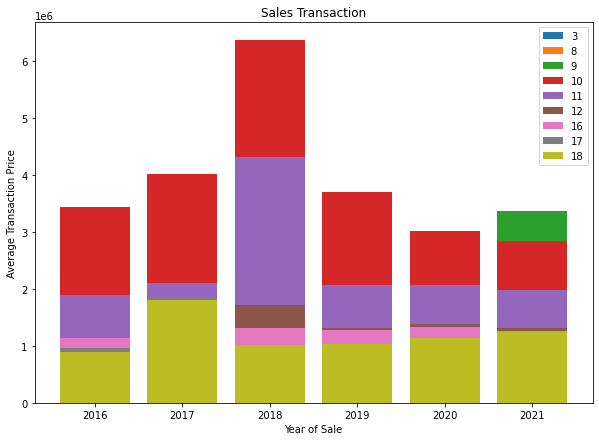

In [10]:
plt.figure(figsize=(10,7))
for col_val in x['postal_district'].unique():
    filter_df = x[x['postal_district'] == col_val]
    plt.bar(filter_df['date_of_sale'], filter_df['price_in_sgd'], label = col_val)
plt.xlabel('Year of Sale')
plt.ylabel('Average Transaction Price')
plt.title('Sales Transaction')
plt.legend()
plt.show()

From the chart above, it shows district 11 has the highest average growth of transaction price in 2018.

## 3. Floor area vs transaction price
The relationship between floor area (sqft) and transaction price in 3 different market segment.

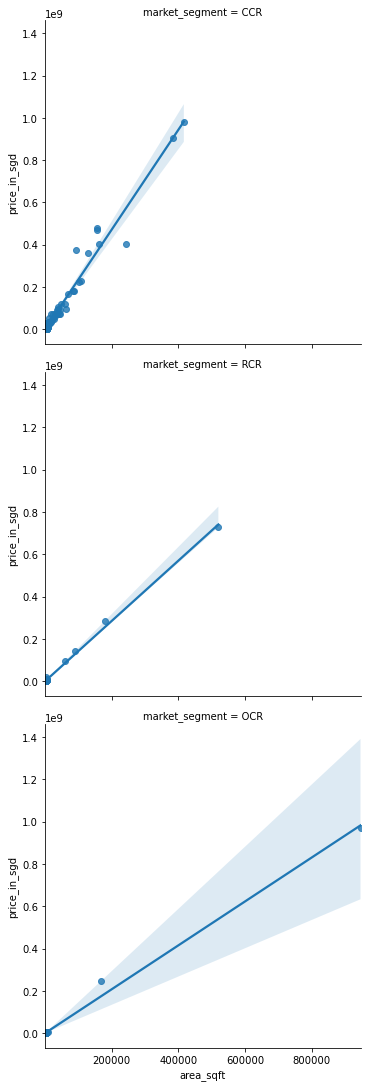

In [11]:
sns.lmplot(x='area_sqft', y='price_in_sgd', data=df_combine, row='market_segment')

## 4. Floor area PSF vs transaction price 
The changes of price PSF (per sqft) in 3 market segments.

In [12]:
df = df_combine.loc[df_combine['tenure'] == 'Freehold']
df = df.loc[:,['date_of_sale' , 'market_segment','unit_price_psf']]
df = df.groupby(['date_of_sale','market_segment']).mean()
df = df.reset_index()

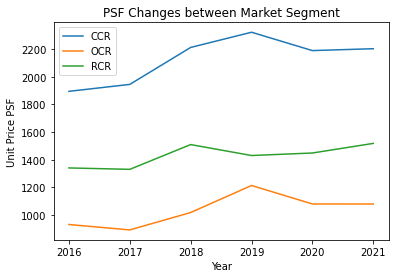

In [13]:
for col_val in df['market_segment'].unique(): 
    filter_df = df[df['market_segment'] == col_val]
    plt.plot(filter_df['date_of_sale'], filter_df['unit_price_psf'], label = col_val)
    plt.xlabel('Year')
    plt.ylabel('Unit Price PSF')
    plt.title('PSF Changes between Market Segment')
    plt.legend()

CCR has the highest PSF among 3 market segments. \
OCR has significant grow in PSF from 2017 to 2019.

## 5. Average transaction price within CCR
Average transaction price within district 9, 10 and 11.

[Text(0, 0, '9'), Text(1, 0, '10'), Text(2, 0, '11')]

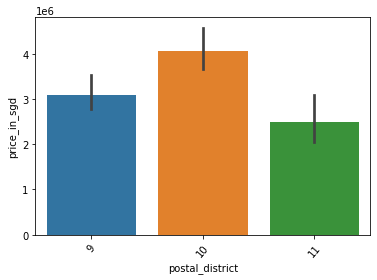

In [14]:
district = sns.barplot(x = 'postal_district', y = 'price_in_sgd', data = df_ccr, estimator = np.mean)
district.set_xticklabels(district.get_xticklabels(), rotation = 50)

District 10 has the highest average transaction price due to sales of a lot of good class bungalows from the data details. 

## 6. The relationship between floor level and transaction price within CCR.
The price changes of floor level within district 9, 10 and 11.

In [15]:
ccr_floor = df_ccr.loc[:,['floor_level','price_in_sgd']]
ccr_floor = ccr_floor.groupby(['floor_level']).mean()
ccr_floor = ccr_floor.reindex(np.roll(ccr_floor.index, shift=1))
ccr_floor = ccr_floor.reset_index()

In [16]:
ccr_floor_area = df_ccr.loc[:,['floor_level','unit_price_psf']]
ccr_floor_area = ccr_floor_area.groupby(['floor_level']).mean()
ccr_floor_area = ccr_floor_area.reindex(np.roll(ccr_floor_area.index, shift=1))
ccr_floor_area = ccr_floor_area.reset_index()

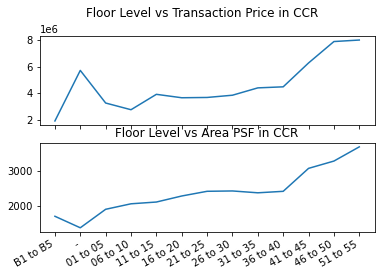

In [17]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot('floor_level','price_in_sgd', data = ccr_floor)
fig.suptitle('Floor Level vs Transaction Price in CCR')
ax2.plot('floor_level','unit_price_psf', data = ccr_floor_area)
plt.title('Floor Level vs Area PSF in CCR')
fig.autofmt_xdate()
plt.show()

Floor level does affect transaction price.
With higher floor, the transaction price becomes more expensive.
It also relate to higher PSF.

From the chart, it shows the ground floor level has the higher  average transaction price but lower price in PSF, it may because of usually the apartment or condo in ground floor has patio/countyard.

## 7. Which project has the highest and lowest transaction price in CCR?
The highest and lowest transaction price in district 9, 10 and 11.

In [18]:
highest_price = df_ccr.price_in_sgd.nlargest(5)
highest_price = df_ccr.loc[highest_price.index,:]
lowest_price = df_ccr.price_in_sgd.nsmallest(5)
lowest_price = df_ccr.loc[lowest_price.index,:]
display(highest_price, lowest_price)

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,no_of_units,price_in_sgd,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
6608,PACIFIC MANSION,RIVER VALLEY CLOSE,Apartment,9,CCR,Freehold,Resale,290,980000000,-,416750,Strata,11 to 15,2352,Mar-18
6406,TULIP GARDEN,FARRER ROAD,Condominium,10,CCR,Freehold,Resale,164,906889000,-,382919,Strata,01 to 05,2368,Apr-18
7444,ROYALVILLE,BUKIT TIMAH ROAD,Condominium,10,CCR,Freehold,Resale,104,477940000,-,154991,Strata,01 to 05,3084,Dec-17
6343,DUNEARN GARDENS,DUNEARN ROAD,Condominium,11,CCR,Freehold,Resale,114,468000000,-,156971,Strata,16 to 20,2981,Apr-18
6946,CITY TOWERS,BUKIT TIMAH ROAD,Apartment,10,CCR,Freehold,Resale,79,401933798,-,162719,Strata,01 to 05,2470,Feb-18


,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,no_of_units,price_in_sgd,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
3469,SUITES @ SHREWSBURY,SHREWSBURY ROAD,Apartment,11,CCR,Freehold,Resale,1,550000,-,334,Strata,01 to 05,1648,Aug-19
4041,SUITES @ SHREWSBURY,SHREWSBURY ROAD,Apartment,11,CCR,Freehold,Resale,1,555000,-,366,Strata,01 to 05,1516,May-19
7688,HILLCREST ARCADIA,ARCADIA ROAD,Condominium,11,CCR,99 yrs lease commencing from 1975,Resale,1,560088,-,581,Strata,01 to 05,964,Nov-17
803,SUITES @ SHREWSBURY,SHREWSBURY ROAD,Apartment,11,CCR,Freehold,Resale,1,565000,-,344,Strata,01 to 05,1640,Nov-20
228,SUITES @ SHREWSBURY,SHREWSBURY ROAD,Apartment,11,CCR,Freehold,Resale,1,579000,-,334,Strata,01 to 05,1735,Jan-21


## 8. Which project the highest and lowest PSF in CCR?
The highest and lowest transaction PSF in district 9, 10 and 11.

In [20]:
# clean data
# drop street name, because of data shows postal district.
# drop type of sale.
# drop nett price, because of no relate data show in this portion.
# drop type of area, because type of apartment/condo means strata type.

df_ccr = df_ccr.drop(['street_name','type_of_sale','nett_price','type_of_area'], axis = 'columns')

In [21]:
highest_price = df_ccr.unit_price_psf.nlargest(5)
highest_price = df_ccr.loc[highest_price.index,:]
lowest_price = df_ccr.unit_price_psf.nsmallest(5)
lowest_price = df_ccr.loc[lowest_price.index,:]
display(highest_price, lowest_price)

,project_name,type,postal_district,market_segment,tenure,no_of_units,price_in_sgd,area_sqft,floor_level,unit_price_psf,date_of_sale
3977,BOULEVARD 88,Apartment,10,CCR,Freehold,1,31000000,6049,26 to 30,5125,Jun-19
4066,BOULEVARD 88,Apartment,10,CCR,Freehold,1,28000000,5673,26 to 30,4936,May-19
4404,BOULEVARD 88,Apartment,10,CCR,Freehold,1,28000000,5683,26 to 30,4927,Mar-19
4074,BOULEVARD VUE,Condominium,10,CCR,Freehold,1,21998000,4478,26 to 30,4913,May-19
4297,BOULEVARD 88,Apartment,10,CCR,Freehold,1,29530000,6028,26 to 30,4899,Apr-19


,project_name,type,postal_district,market_segment,tenure,no_of_units,price_in_sgd,area_sqft,floor_level,unit_price_psf,date_of_sale
10799,PEACE CENTRE/MANSIONS,Apartment,9,CCR,99 yrs lease commencing from 1970,1,1320000,2605,11 to 15,507,Jan-17
12761,PEACE CENTRE/MANSIONS,Apartment,9,CCR,99 yrs lease commencing from 1970,1,1200000,2347,21 to 25,511,Mar-16
11203,PEACE CENTRE/MANSIONS,Apartment,9,CCR,99 yrs lease commencing from 1970,1,1250000,2347,16 to 20,533,Oct-16
1600,PEACE CENTRE/MANSIONS,Apartment,9,CCR,99 yrs lease commencing from 1970,1,1500000,2605,11 to 15,576,Jul-20
5382,PEACE CENTRE/MANSIONS,Apartment,9,CCR,99 yrs lease commencing from 1970,1,1500000,2605,11 to 15,576,Aug-18


From the highest PSF, we can see that both the floor level and unit size are high, a conjunction is that these could be Penthouses in luxourious condos with extra anenities.
On the cheapest PSF units, we quickly realise that the units are 99 years old with less than 50 years remaining. A very huge hint on the cheap prices.

## Challenge
Absence on the date of TOP for the project as well as the relevant age of the property when sold each time. Common assumptions now are that property prices (especially for Tenure of 99years) will have an appreciating value accordance to time due to inflation, demand etc, until a point when the depreciating tenure cost exceeds the appreciation, resulting in the downward trend of the property, since the property value will be deemed as $0 after 99 years when tenure left = 0 years. 

Thus, the age of the property for 99 years tenure upon sales will be an criteria following the course of time. E.g. on the same street, 2 property will see a divergence in price appreciation over a specific year, but the reason could be that one is 10 years old turning 11 and the other is 35 years old turning 36.

This challenge should be able to be overcome by doing research on the property name and adding 2 more columns on the data: “date of TOP” and “remaining lease”.
